# Libraries used:
* numpy
* pandas
* sklearn
* statsmodel

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statsmodels.graphics.mosaicplot import mosaic

# Data Prep

In [22]:
df=pd.read_csv('student-mat.csv',delimiter=';') 

G3=df['G3']
df = df.drop(columns="G3")

for i in range(len(G3)):
    if G3[i]<=4:
        G3[i]=0
    if G3[i]>=5 and G3[i]<=8:
        G3[i]=1
    if G3[i]>=9 and G3[i]<=12:
        G3[i]=2
    if G3[i]>=13 and G3[i]<=16:
        G3[i]=3
    if G3[i]>=17 and G3[i]<=20:
        G3[i]=4
        
df = pd.concat([df,G3],axis=1)

odf=df.copy()

school_map1 = {'GP': 1, 'MS': 0}
sex_map2 = {'M': 1, 'F': 0}
address_map4 = {'U': 1, 'R': 0}
famsize_map5 = {'LE3': 1, 'GT3': 0}
Pstatus_map6 = {'T': 1, 'A': 0}
schoolsup_map16 = {'yes': 1, 'no': 0}
famsup_map17 = {'yes': 1, 'no': 0}
paid_map18 = {'yes': 1, 'no': 0}
activities_map19 = {'yes': 1, 'no': 0}
nursery_map20 = {'yes': 1, 'no': 0}
higher_map21 = {'yes': 1, 'no': 0}
internet_map22 = {'yes': 1, 'no': 0}
romantic_map23 = {'yes': 1, 'no': 0}

df['school'] = df['school'].map(school_map1)
df['sex'] = df['sex'].map(sex_map2)
df['address'] = df['address'].map(address_map4)
df['famsize'] = df['famsize'].map(famsize_map5)
df['Pstatus'] = df['Pstatus'].map(Pstatus_map6)
df['schoolsup'] = df['schoolsup'].map(schoolsup_map16)
df['famsup'] = df['famsup'].map(famsup_map17)
df['paid'] = df['paid'].map(paid_map18)
df['activities'] = df['activities'].map(activities_map19)
df['nursery'] = df['nursery'].map(nursery_map20)
df['higher'] = df['higher'].map(higher_map21)
df['internet'] = df['internet'].map(internet_map22)
df['romantic'] = df['romantic'].map(romantic_map23)

column_trans=make_column_transformer((OneHotEncoder(),['Mjob','Fjob',
'reason','guardian']),remainder='passthrough')

data=column_trans.fit_transform(df)


n1 = data.shape[0]
n2 = data.shape[1]
m=int(0.8*n1)


# Data Visualisation

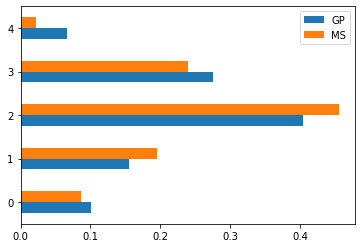

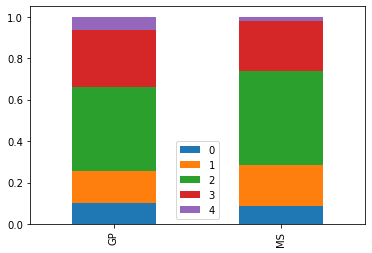

In [23]:
GP_list = df.loc[df['school']==1]
GP_count = GP_list['G3'].value_counts(normalize=True,sort=False,dropna=True)

MS_list = df.loc[df['school']==0]
MS_count = MS_list['G3'].value_counts(normalize=True,sort=False,dropna=True)

school_count = pd.concat([GP_count,MS_count],axis=1)
school_count.columns=['GP','MS']

school_plot = school_count.plot.barh()

school_plot_stacked = school_count.T.plot.bar(stacked=True)

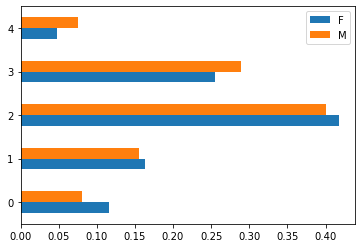

In [24]:
F_list = df.loc[df['sex']==0]
F_count = F_list['G3'].value_counts(normalize=True,sort=False,dropna=True)

M_list = df.loc[df['sex']==1]
M_count = M_list['G3'].value_counts(normalize=True,sort=False,dropna=True)

sex_count = pd.concat([F_count,M_count],axis=1)
sex_count.columns=['F','M']

sex_plot = sex_count.plot.barh()

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('GP', '1', 'F'),
               (0.0, 0.0, 0.5035773353800386, 0.1526919016739557)),
              (('GP', '1', 'M'),
               (0.5055266670008645,
                0.0,
                0.37362189399164153,
                0.1526919016739557)),
              (('GP', '2', 'F'),
               (0.0,
                0.1559813753581662,
                0.46659533477217024,
                0.3986955210375509)),
              (('GP', '2', 'M'),
               (0.4685446663929962,
                0.1559813753581662,
                0.4106038945995098,
                0.3986955210375509)),
              (('GP', '3', 'F'),
               (0.0,
                0.5579663700799278,
                0.42946212271321826,
                0.2714522696425879)),
              (('GP', '3', 'M'),
               (0.4314114543340442,
                0.5579663700799278,
                0.44773710665846167,
                0.2714522696425879)),
         

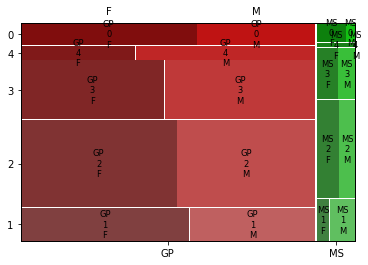

In [25]:
mosaic(odf,["school","G3","sex",])